In [1]:
import numpy as np
from lab3_proto import *
#from proto2 import *
from lab3_proto import *
from lab3_tools import *
from lab2_proto import *
from lab2_tools import *
from lab1_proto import *
from lab1_tools import *
from IPython.display import Audio,Image
from scipy.signal import lfilter
from prondict import *



first time setup: download tidigits to this folder using this link: https://drive.google.com/file/d/1UgY60Uek1OznD7VGRFyOiF_eqwSVvhM3/view?usp=sharing

In [2]:
path2info('tidigits/disc_4.1.1/tidigits/train/woman/ac/z849768a.wav') #'tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

('woman', 'ac', 'z849768', 'a')

In [3]:
path2info('tidigits\\disc_4.1.1\\tidigits\\train\\man\\ae\\z9z6531a.wav')

('man', 'ae', 'z9z6531', 'a')

In [4]:
import soundfile as sf
loadAudio("C:\\Users\\A\\Desktop\\KTH\\dt2119_speech_recpgmotopm\\Speech-and-speaker-recognition\\lab3\\tidigits\\tidigits\\disc_4.1.1\\tidigits\\train\\man\\ae\\1a.wav")

(array([ 8, 10, 10, ..., 14, 14, 10], dtype=int16), 20000)

In [5]:
from pathlib import Path
base_path = Path("C:\\Users\\A\\Desktop\\KTH\\dt2119_speech_recpgmotopm\\Speech-and-speaker-recognition\\lab3\\tidigits\\")
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
filepath = base_path / Path(filename)
samples, samplingrate = loadAudio(filepath)

In [6]:
phoneHMMs = np.load('lab2_models_all.npz',allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]
stateList


['ah_0',
 'ah_1',
 'ah_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'eh_0',
 'eh_1',
 'eh_2',
 'ey_0',
 'ey_1',
 'ey_2',
 'f_0',
 'f_1',
 'f_2',
 'ih_0',
 'ih_1',
 'ih_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'k_0',
 'k_1',
 'k_2',
 'n_0',
 'n_1',
 'n_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'r_0',
 'r_1',
 'r_2',
 's_0',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_2',
 'sp_0',
 't_0',
 't_1',
 't_2',
 'th_0',
 'th_1',
 'th_2',
 'uw_0',
 'uw_1',
 'uw_2',
 'v_0',
 'v_1',
 'v_2',
 'w_0',
 'w_1',
 'w_2',
 'z_0',
 'z_1',
 'z_2']

In [7]:
stateList.index('ay_2')

8

## 4.2

In [8]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(base_path / Path(filename))

lmfcc = mfcc(samples)

In [9]:
example = np.load("lab3_example.npz",allow_pickle=True)['example'].item()

In [10]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(base_path / Path(filename))
lmfcc = mfcc(samples)
wordTrans = list(path2info(filename)[2])
phoneTrans = words2phones(wordTrans,prondict)
utteranceHMM = concatHMMs(phoneHMMs,phoneTrans)

In [11]:
lmfcc.shape

(178, 13)

In [12]:
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans 
              for stateid in range(nstates[phone])]

In [13]:
stateTrans[10]

'r_1'

In [14]:
#align the states in the utteranceHMM model to the sequence of feature vectors in lmfcc

X0 = lmfcc
Hmm = utteranceHMM
log_likelihoods=log_multivariate_normal_density_diag(X0,Hmm["means"],Hmm["covars"])
score,path=viterbi(log_likelihoods,np.log(Hmm["startprob"]),np.log(Hmm["transmat"]),False)
state_seq = []
for i in range(len(path)):
    state_seq.append(stateTrans[path[i]])
state_seq

C:\Users\A\AppData\Local\Temp\ipykernel_8196\1985007783.py:6: RuntimeWarning: divide by zero encountered in log
  score,path=viterbi(log_likelihoods,np.log(Hmm["startprob"]),np.log(Hmm["transmat"]),False)


['sil_0',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_2',
 'z_0',
 'z_0',
 'z_0',
 'z_0',
 'z_1',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'f_0',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'th_0',


In [15]:
path

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  3,  3,  3,  3,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 11, 12, 13, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 23, 24, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       30, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 34, 34, 34,
       34, 34, 34, 34, 34, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 37, 38], dtype=int64)

In [16]:
#take state_seq and create a transcription file based on it
#[sil_0,sil_1,sil_1,z_0,z_1,z_2...] -> "z" at 40 ms
frames2trans(state_seq, outfilename='z43a.lab')

'0 0.01 sil_0\n0.01 0.19000000000000003 sil_1\n0.19000000000000003 0.20000000000000004 sil_2\n0.20000000000000004 0.24000000000000007 z_0\n0.24000000000000007 0.25000000000000006 z_1\n0.25000000000000006 0.36000000000000015 z_2\n0.36000000000000015 0.4400000000000002 iy_0\n0.4400000000000002 0.45000000000000023 iy_1\n0.45000000000000023 0.46000000000000024 iy_2\n0.46000000000000024 0.5600000000000003 r_0\n0.5600000000000003 0.5700000000000003 r_1\n0.5700000000000003 0.5800000000000003 r_2\n0.5800000000000003 0.5900000000000003 ow_0\n0.5900000000000003 0.6000000000000003 ow_1\n0.6000000000000003 0.6900000000000004 ow_2\n0.6900000000000004 0.7000000000000004 f_0\n0.7000000000000004 0.8100000000000005 f_1\n0.8100000000000005 0.8200000000000005 f_2\n0.8200000000000005 0.8300000000000005 ao_0\n0.8300000000000005 0.9700000000000006 ao_1\n0.9700000000000006 1.0800000000000007 ao_2\n1.0800000000000007 1.1100000000000008 r_0\n1.1100000000000008 1.1200000000000008 r_1\n1.1200000000000008 1.13000

the alignment is mostly good but some parts bleed in to each other e.g. "r" in four

## 4.3

In [17]:
stateList.index("ah_0") 

0

In [18]:
import os
from pathlib import Path
if not Path("traindata.npz").exists():
    traindata = []
    for root, dirs, files in os.walk(base_path / 'tidigits/disc_4.1.1/tidigits/train'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)
                
                mspec_vals = mspec(samples)

                lmfcc = mfcc(samples)
                wordTrans = list(path2info(filename)[2])
                #phoneHMM har vi redan
                phoneTrans = words2phones(wordTrans,prondict)
                utteranceHMM = concatHMMs(phoneHMMs,phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans 
                                for stateid in range(nstates[phone])]
                Hmm = utteranceHMM
                log_likelihoods=log_multivariate_normal_density_diag(lmfcc,Hmm["means"],Hmm["covars"])
                score,path=viterbi(log_likelihoods,np.log(Hmm["startprob"]),np.log(Hmm["transmat"]),False)
                
                state_seq = []
                for i in range(len(path)):
                    state_seq.append(stateTrans[path[i]])
                

                traindata.append({'filename': filename, 'lmfcc': lmfcc,
                    'mspec': mspec_vals, 'targets': state_seq})
    np.savez('traindata.npz', traindata=traindata)

In [19]:
import os
if not Path("testdata.npz").exists():
    testdata = []
    for root, dirs, files in os.walk(base_path / 'tidigits/disc_4.2.1/tidigits/test'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)
                
                mspec_vals = mspec(samples)

                lmfcc = mfcc(samples)
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans,prondict)
                utteranceHMM = concatHMMs(phoneHMMs,phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans 
                                for stateid in range(nstates[phone])]
                Hmm = utteranceHMM
                log_likelihoods=log_multivariate_normal_density_diag(lmfcc,Hmm["means"],Hmm["covars"])
                score,path=viterbi(log_likelihoods,np.log(Hmm["startprob"]),np.log(Hmm["transmat"]),False)
                
                state_seq = []
                for i in range(len(path)):
                    state_seq.append(stateTrans[path[i]])
                

                testdata.append({'filename': filename, 'lmfcc': lmfcc,
                    'mspec': mspec_vals, 'targets': state_seq})
    np.savez('testdata.npz', testdata=testdata)

In [20]:
traindata = np.load("traindata.npz",allow_pickle=True)['traindata']
testdata = np.load("testdata.npz",allow_pickle=True)['testdata']

## 4.4

In [21]:
males = []
females = []
for i in range(len(traindata)):
    speaker_gender = path2info(traindata[i]["filename"])[0]
    if speaker_gender == "man":
        males.append(traindata[i])
    else:
        females.append(traindata[i])
len(males),len(females)

(4235, 4388)

In [22]:
import random
train_size_male = int(0.9 * len(males))
train_size_female = int(0.9 * len(females))

random.shuffle(males)
random.shuffle(females)
#extract the amount of males we need
train_males = males[:train_size_male]
val_males = males[train_size_male:]
#females we need
train_females = females[:train_size_female]
val_females = females[train_size_female:]
#merge them
train_data = train_males + train_females
val_data = val_males + val_females
#shuffle again to avoid it being MMMM...FFFF... instead MFMFFMFM...
random.shuffle(train_data)
random.shuffle(val_data)

In [23]:
#check gender ratio
for k in [train_data,val_data]:
    male = 0
    female = 0
    for i in range(len(k)):
        speaker_gender = path2info(k[i]["filename"])[0]
        if speaker_gender == "man":
            male += 1
        else:
            female +=1
    print(f"male to female ratio is {male/female}")

male to female ratio is 0.9650544441630793
male to female ratio is 0.9658314350797267


In [24]:
traindata=train_data
valdata=val_data


## 4.5

In [25]:
def get_indices(i,length):
    idx_list = list(range(length))
    idx_list = idx_list[1:4][::-1] + idx_list + idx_list[-4:-1][::-1]
    return idx_list[i:i + 7]
for dataset in [traindata, valdata,testdata]:
    for i in range(len(dataset)):
        #Tx91, where T is number of frames in the datapoint
        datapoint_dynamic = np.zeros((len(dataset[i]["lmfcc"]),7*dataset[i]["lmfcc"].shape[1]))#a new matrix that stores the stacked (dynamic) data of dataset[i]
        for t in range(len(dataset[i])):
            indxs = get_indices(t,len(dataset[i]))
            for k in indxs:
                datapoint_dynamic[t,13*k:13*(k+1)] = dataset[i]["lmfcc"][k] #1x13

        dataset[i]["lmfcc_dynamic"] = datapoint_dynamic

In [26]:
traindata[2]["lmfcc_dynamic"].shape,traindata[2]["lmfcc"].shape

((87, 91), (87, 13))

create dynamic version of mspec

In [27]:
for dataset in [traindata, valdata,testdata]:
    for i in range(len(dataset)):
        #Tx91, where T is number of frames in the datapoint
        datapoint_dynamic = np.zeros((len(dataset[i]["mspec"]),7*dataset[i]["mspec"].shape[1]))#a new matrix that stores the stacked (dynamic) data of dataset[i]
        for t in range(len(dataset[i])):
            indxs = get_indices(t,len(dataset[i]))
            for k in indxs:
                datapoint_dynamic[t,40*k:40*(k+1)] = dataset[i]["mspec"][k] #1x13

        dataset[i]["mspec_dynamic"] = datapoint_dynamic

create our big matrices

In [28]:
lmfcc_train_x=np.concatenate([d["lmfcc"] for d in traindata]).astype('float32')
lmfcc_val_x=np.concatenate([d["lmfcc"] for d in valdata]).astype('float32')
lmfcc_test_x=np.concatenate([d["lmfcc"] for d in testdata]).astype('float32')

lmfcc_train_x_dynamic = np.concatenate([d["lmfcc_dynamic"] for d in traindata]).astype('float32')
lmfcc_val_x_dynamic=np.concatenate([d["lmfcc_dynamic"] for d in valdata]).astype('float32')
lmfcc_test_x_dynamic=np.concatenate([d["lmfcc_dynamic"] for d in testdata]).astype('float32')


mspec_train_x = np.concatenate([d["mspec"] for d in traindata]).astype('float32')
mspec_val_x = np.concatenate([d["mspec"] for d in valdata]).astype('float32')
mspec_test_x = np.concatenate([d["mspec"] for d in testdata]).astype('float32')


mspec_train_x_dynamic = np.concatenate([d["mspec_dynamic"] for d in traindata]).astype('float32') 
mspec_val_x_dynamic = np.concatenate([d["mspec_dynamic"] for d in valdata]).astype('float32')
mspec_test_x_dynamic = np.concatenate([d["mspec_dynamic"] for d in testdata]).astype('float32') 



normalize

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(lmfcc_train_x) 
lmfcc_train_x = scaler.transform(lmfcc_train_x)
lmfcc_val_x = scaler.transform(lmfcc_val_x)
lmfcc_test_x = scaler.transform(lmfcc_test_x)

scaler = StandardScaler()
scaler.fit(lmfcc_train_x_dynamic)
lmfcc_train_x_dynamic = scaler.transform(lmfcc_train_x_dynamic)
lmfcc_val_x_dynamic = scaler.transform(lmfcc_val_x_dynamic)
lmfcc_test_x_dynamic = scaler.transform(lmfcc_test_x_dynamic)


scaler = StandardScaler()
scaler.fit(mspec_train_x)
mspec_train_x = scaler.transform(mspec_train_x)
mspec_val_x = scaler.transform(mspec_val_x)
mspec_test_x = scaler.transform(mspec_test_x)

scaler = StandardScaler()
scaler.fit(mspec_train_x_dynamic)
mspec_train_x_dynamic = scaler.transform(mspec_train_x_dynamic)
mspec_val_x_dynamic = scaler.transform(mspec_val_x_dynamic)
mspec_test_x_dynamic = scaler.transform(mspec_test_x_dynamic)


In [30]:

import torch
import torch.nn.functional as F

train_y = np.concatenate([[stateList.index(targ) for targ in d["targets"]] for d in traindata]).flatten()
print(train_y.shape)
val_y = np.concatenate([[stateList.index(targ) for targ in d["targets"]] for d in valdata]).flatten()
print(val_y.shape)
test_y = np.concatenate([[stateList.index(targ) for targ in d["targets"]] for d in testdata]).flatten()
print(test_y.shape)

output_dim = len(stateList)

#train_y = F.one_hot(torch.tensor(train_y, dtype=torch.long),num_classes=output_dim)
#val_y = F.one_hot(torch.tensor(val_y, dtype=torch.long),num_classes=output_dim)
#test_y = F.one_hot(torch.tensor(test_y, dtype=torch.long),num_classes=output_dim)


(1357778,)
(149614,)
(1527014,)


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#experiment 1
train_x = mspec_train_x
val_x = mspec_val_x
test_x = mspec_test_x
class SimpleNet(nn.Module):
    def __init__(self,input_size):
        super(SimpleNet, self).__init__()
        # Define layers here, for example:
        # A fully connected layer from input of size to a hidden layer of size 256
        self.fc1 = nn.Linear(input_size, 256)
        # Define the second hidden layer
        self.fc2 = nn.Linear(256, 256)
        # Define the third hidden layer
        self.fc3 = nn.Linear(256, 256)
        # Define the fourth hidden layer
        self.fc4 = nn.Linear(256, output_dim)

    
    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)
        x = F.relu(x)  # Apply ReLU activation after first layer
        x = self.fc2(x)          # Output layer
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x
    
    def count_parameters(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)




In [32]:
net = SimpleNet(train_x.shape[1])
print(net.count_parameters())
optimizer = torch.optim.Adam(net.parameters())#SGD(net.parameters(),lr=1e-3)
batch_size = 256
net.to(torch.device("cuda"))

157757


SimpleNet(
  (fc1): Linear(in_features=40, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=61, bias=True)
)

In [33]:
from torch.utils.tensorboard import SummaryWriter

train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y)
val_x = torch.tensor(val_x)
val_y = torch.tensor(val_y)
test_x = torch.tensor(test_x)
test_y = torch.tensor(test_y)

# create the data loaders for training and validation sets
train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = torch.utils.data.TensorDataset(val_x, val_y)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# setup logging so that you can follow training using TensorBoard (see https://pytorch.org/docs/stable/tensorboard.html)
num_epochs = 100

In [34]:
#cross entropy bcs of classfication task
criterion = nn.CrossEntropyLoss()

training loop

In [35]:
device = torch.device("cuda")

In [36]:
writer = SummaryWriter()

In [37]:
for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    total_train = 0
    total_val = 0
    correct_train = 0
    correct_val = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).long()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # accumulate the training loss
        train_loss += loss.item()
        #training accuracy
        _,predicted = torch.max(outputs,1)
        total_train += labels.size(0)
        correct_train += torch.sum(predicted==labels).item()
    # calculate the validation loss
    net.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).long()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            #validation accuracy
            _,predicted = torch.max(outputs,1)
            total_val += labels.size(0)
            correct_val += torch.sum(predicted==labels).item()

    # print the epoch loss
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_acc = correct_train / total_train
    val_acc = correct_val / total_val

    print(f'Epoch {epoch}: train_loss={train_loss}, val_loss={val_loss},train_acc={train_acc},val_acc={val_acc}')
    writer.add_scalars('loss',{'train':train_loss,'val':val_loss},epoch)
    writer.add_scalars('accuracy',{'train':train_acc,'val':val_acc},epoch)

KeyboardInterrupt: 

In [ ]:
inputs.shape

torch.Size([256, 40])

In [ ]:
torch.save(net.state_dict(), 'experiment_11.pt')

evaluate on testset

In [ ]:
test_x = torch.tensor(test_x)
test_dataset = torch.utils.data.TensorDataset(test_x, test_y)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


net.eval()
total_test = 0
correct_test = 0
with torch.no_grad():
    test_loss = 0.0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).long()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        #test accuracy
        _,predicted = torch.max(outputs,1)
        total_test += labels.size(0)
        correct_test += torch.sum(predicted==labels).item()

test_loss /= len(test_loader)
test_acc = correct_test / total_test

print(f'train_loss: {round(train_loss,3)}, val_loss: {round(val_loss,3)}, train_acc: {round(train_acc,3)}, val_acc: {round(val_acc,3)}, test_loss: {round(test_loss,3)}, test_acc: {round(test_acc,3)}')

C:\Users\A\AppData\Local\Temp\ipykernel_9844\1745860588.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_x = torch.tensor(test_x)


train_loss: 609.822, val_loss: 1.059, train_acc: 0.724, val_acc: 0.676, test_loss: 1.42, test_acc: 0.605


save the trained network

In [ ]:
torch.save(net.state_dict(), 'experiment_6.pt')

# experiments

## experiment 1 (faulty mfcc)
- ADAM with BCEWithLogitsLoss
- forgot to normalize data
- loss started at around 0.03 and didnt improve basically at all
accuracy was ca 60.3% for both validation and training
- test error ca 0.03 and test accuracy ca 60.3%
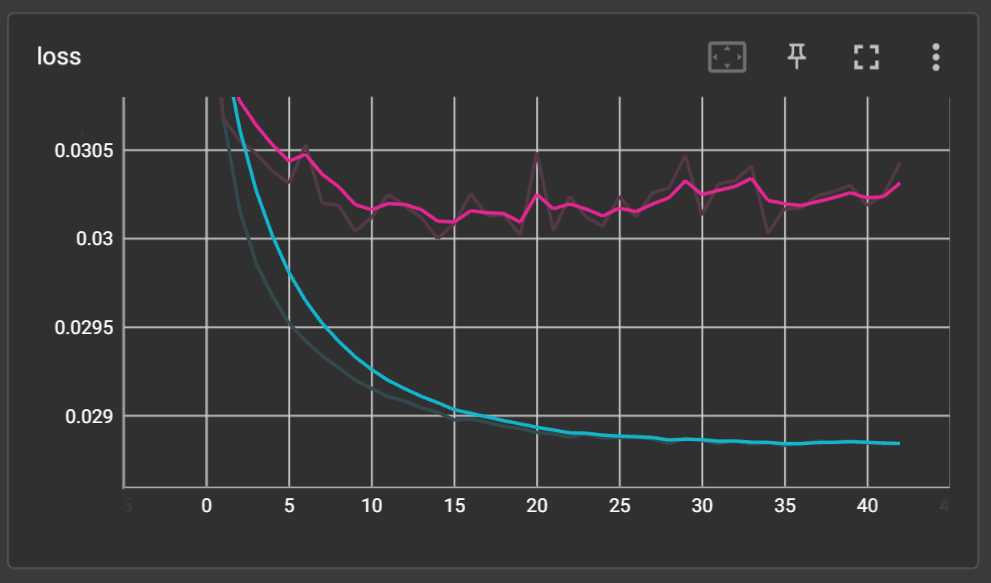

## experiment 2 (faulty mel)
- ADAM with BCEWithLogitsLoss
- forgot to normalize data
- same results as in faulty experiment 1 more or less
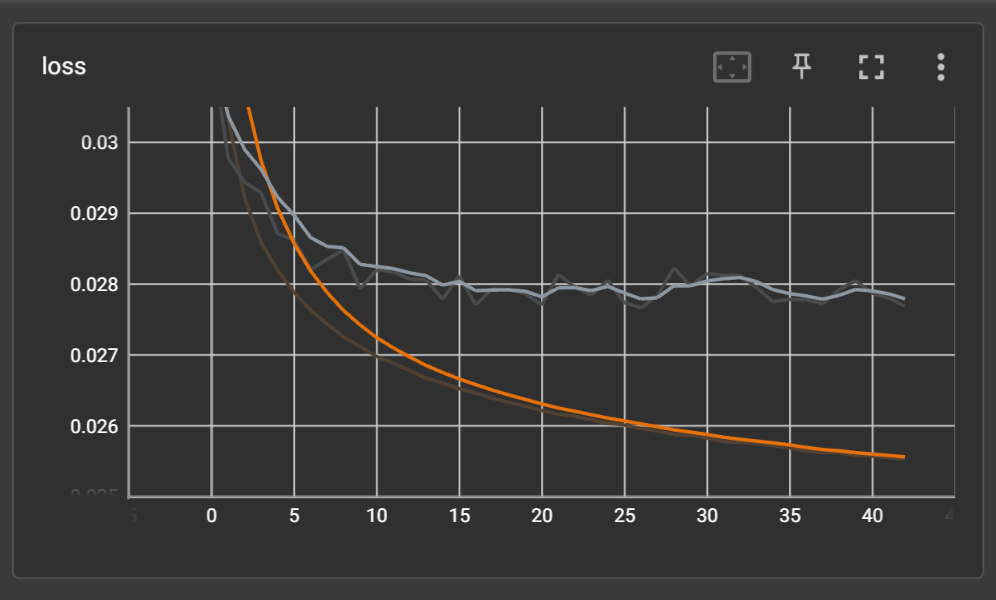

## experiment 3 (no normalization mel)
- fixed accuracy calculation, and lr? but still forgot to normalize data
- SGD with lr=1e-3
- still uses BCEWithLogitsLoss
- train_loss=0.046, val_loss=0.0456,train_acc=0.45,val_acc=0.45, test_loss=0.046,test_acc=0.45
- exp_2_net_2_epoch_100.pt
- cut because the beginning of the training run got bunched in with a previous erroneous one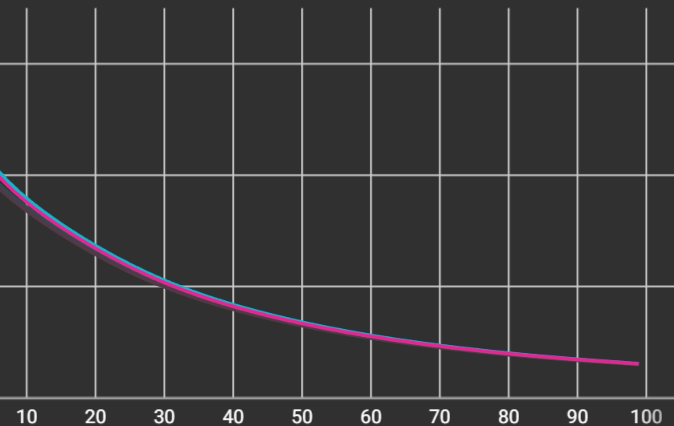

## experiment 4 (no normalization mfcc)
- fixed accuracy calculation, and lr compared to 1? but still forgot to normalize data
- SGD with lr=1e-3
- still uses BCEWithLogitsLoss
- exp_1_net_2_epoch_100.pt
- train_loss: 0.035, val_loss: 0.036, train_acc: 0.588, val_acc: 0.578, test_loss: 0.037, test_acc: 0.56
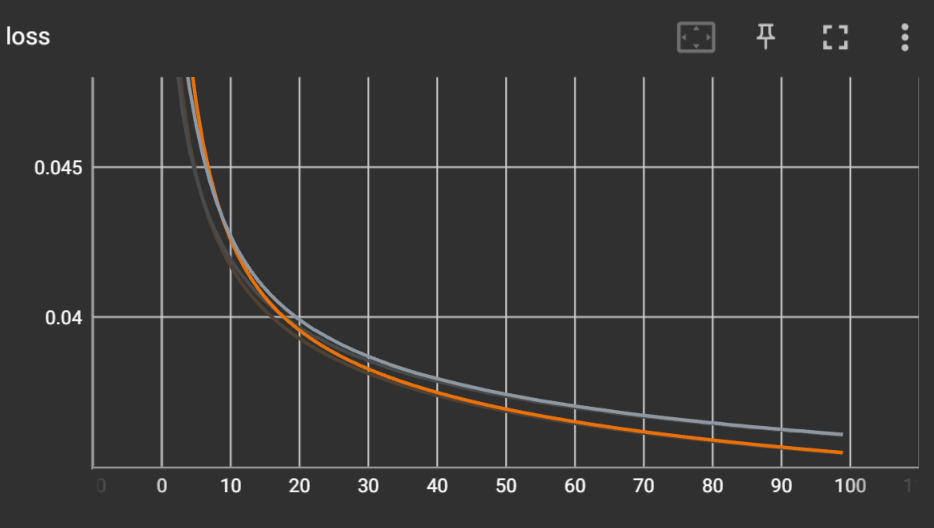
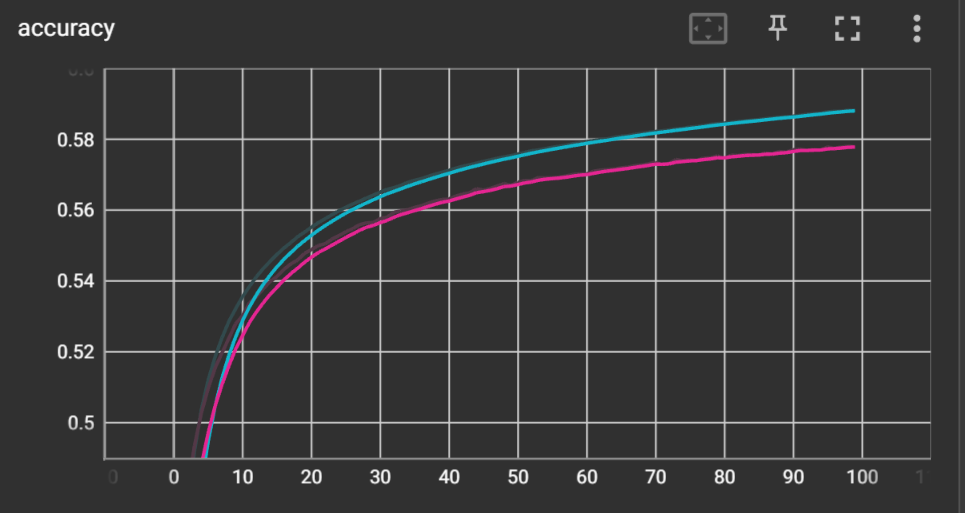

## experiment 5 (mfcc global norm)
- experiment 4 but we added normalization over the entire dataset
- way worse performance initially but cathces up!
- lr=1e-2
- train_loss: 0.036, val_loss: 0.036, train_acc: 0.568, val_acc: 0.565
- 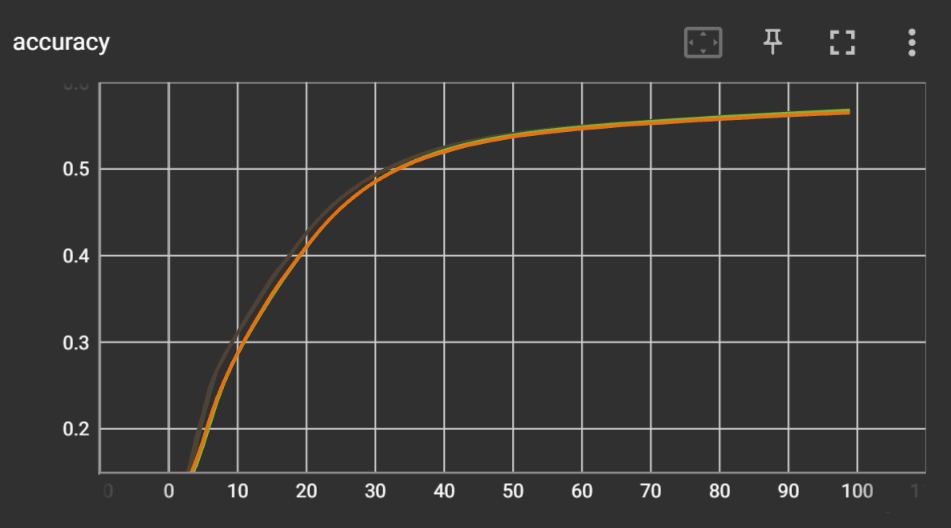
- 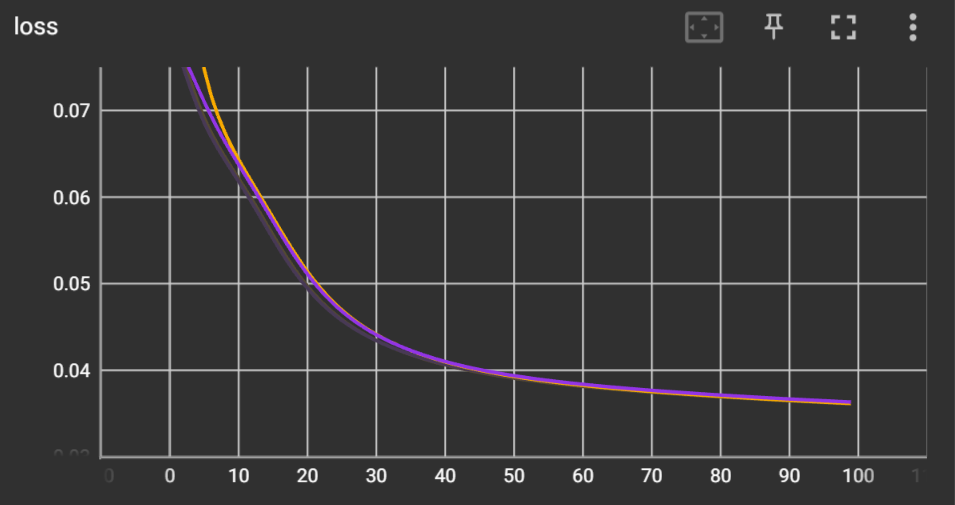

## experiment 6 (dynamic mfcc global norm)
- lr=1e-3
- experiment_6.pt
- train_loss: 0.076, val_loss: 0.076, train_acc: 0.141, val_acc: 0.137 test_loss: 0.076, test_acc: 0.147
- 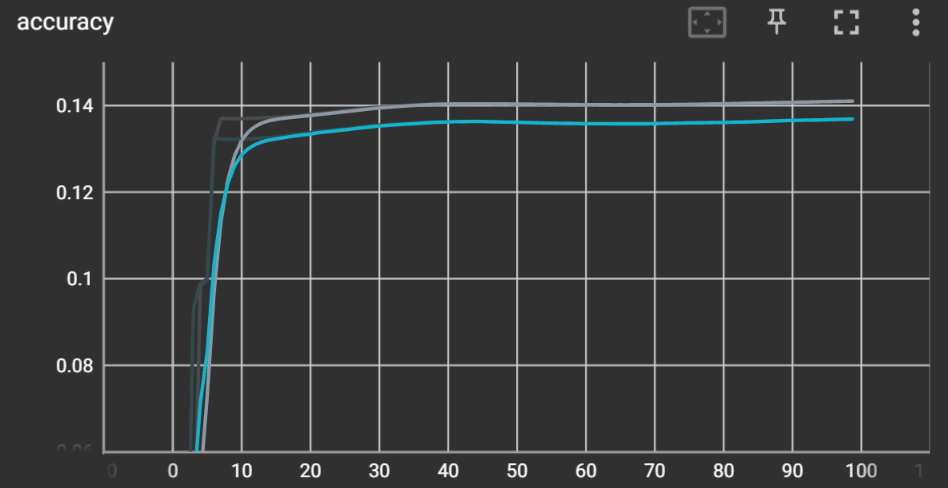
- 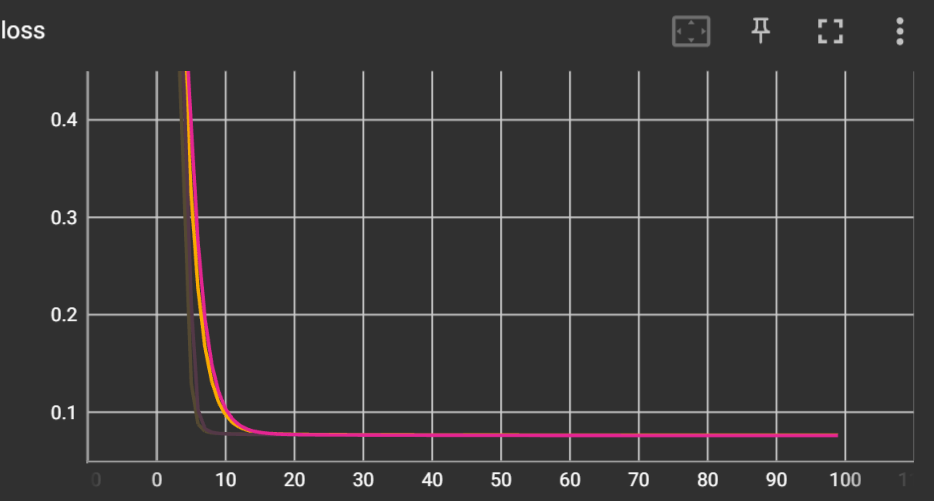

## experiment 7 (mel global norm)
- lr=1e-3
- train_loss: 0.06, val_loss: 0.06, train_acc: 0.293, val_acc: 0.295, test_loss: 0.06, test_acc: 0.295
- experiment_7.pt
- 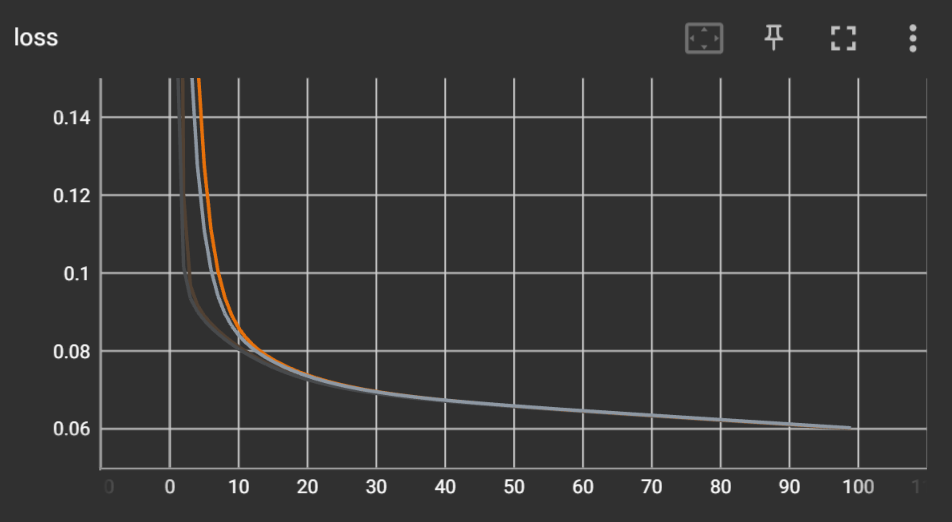
- 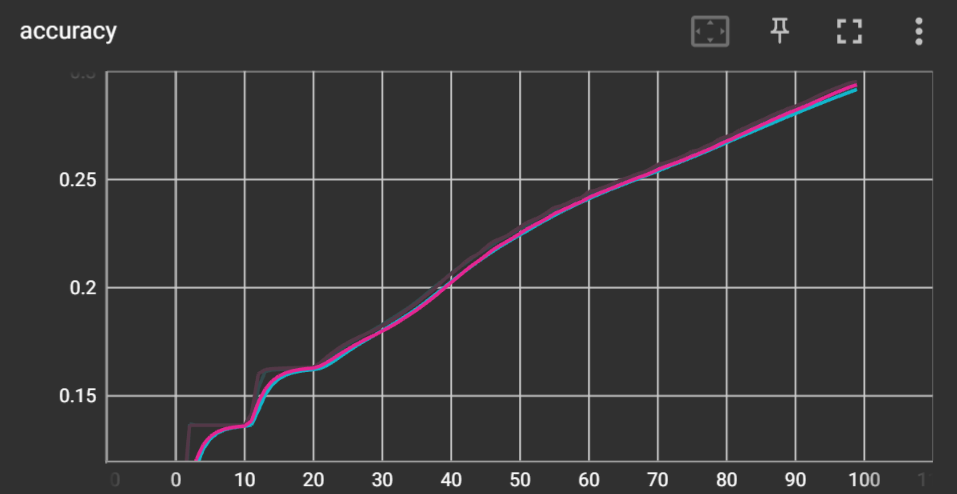

## experiment 8 (mfcc global norm CrossEnt SGD)
- CrossEntropy instead of BCNE
- train_loss: 1.204, val_loss: 1.216, train_acc: 0.626, val_acc: 0.622, test_loss: 1.286, test_acc: 0.601
- experiment_8.pt
- 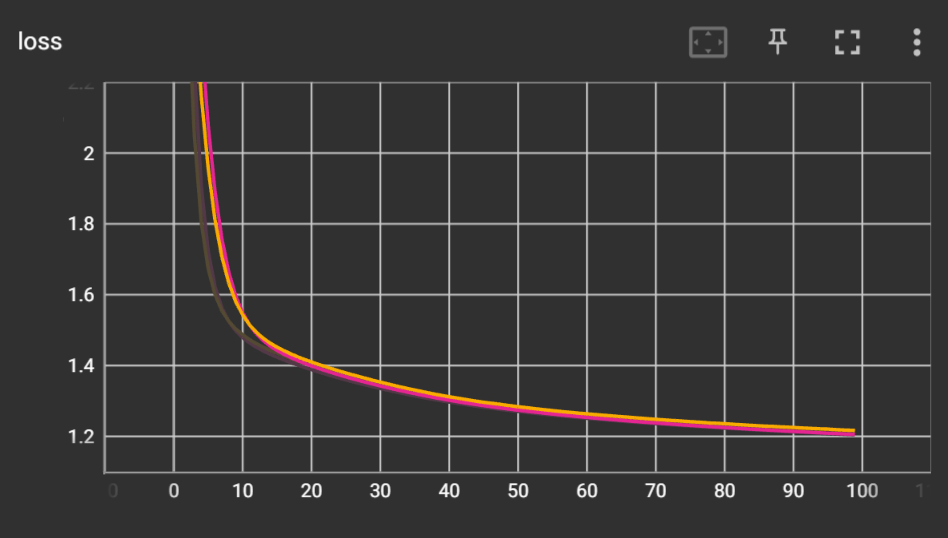
- 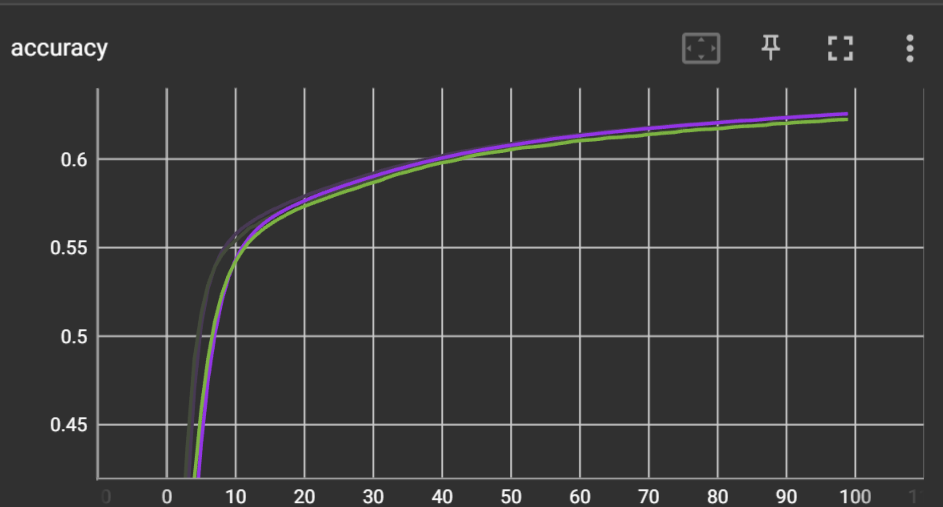
- 


## experiment 9 (mfcc global norm CrossEnt Adam)
- exp. 8 but with Adam (and therefore lr=1e-2)
- val_loss: 1.141, train_acc: 0.701, val_acc: 0.653, test_loss: 1.451, test_acc: 0.589
- 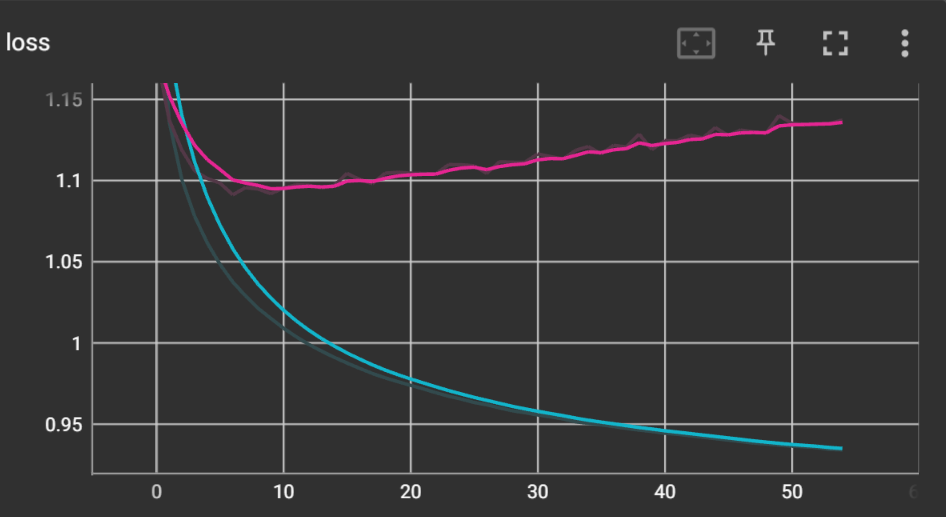
- 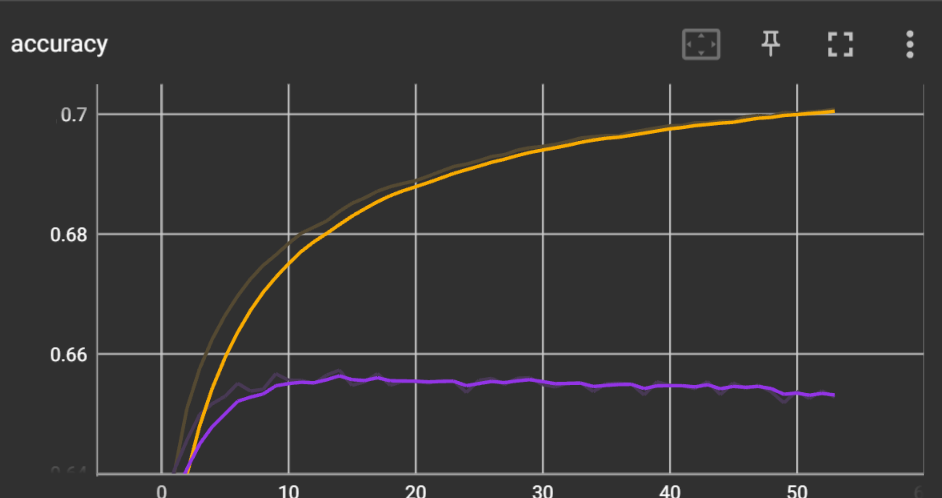

## experiment 10 (dynamic mfcc global norm CrossEnt Adam)
- val_loss: 4.107, train_acc: 0.143, val_acc: 0.141, test_loss: 3.944, test_acc: 0.149
- experiment_10.pt
- 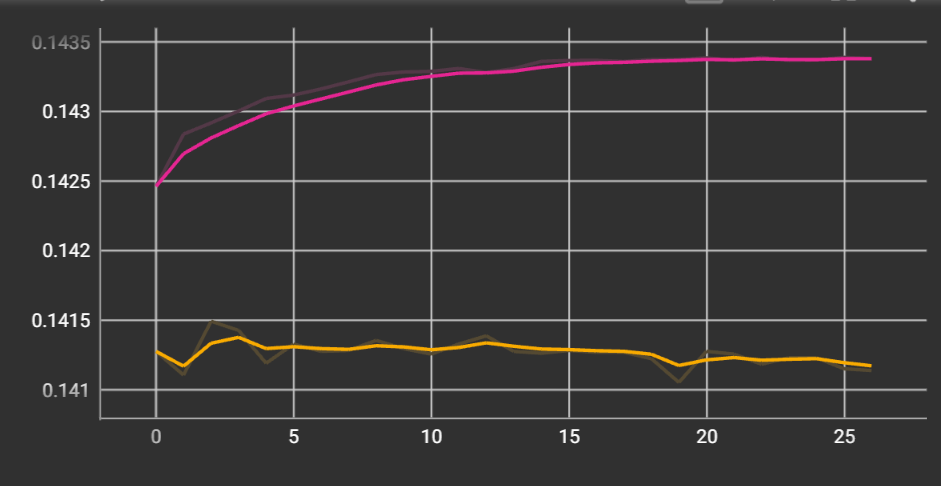
- 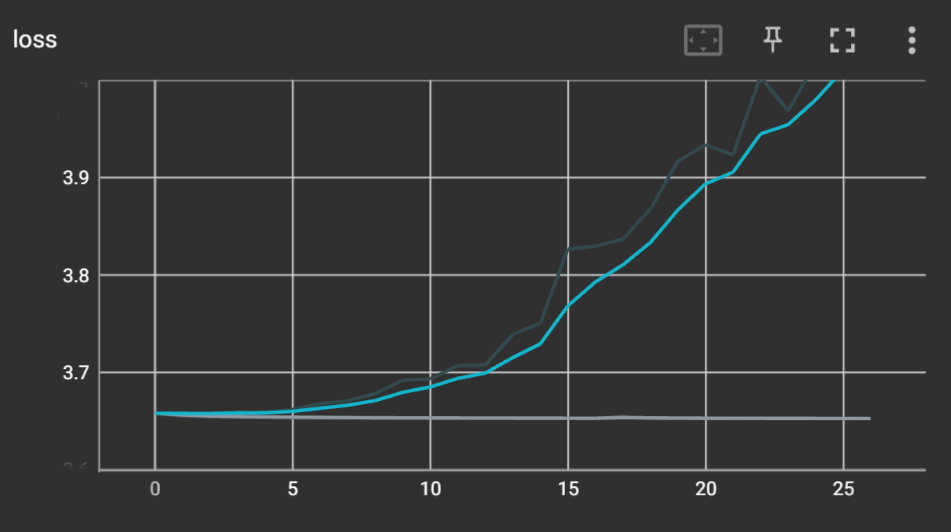

## experiment 11 (mel global norm CrossEnt Adam)
- val_loss: 1.059, train_acc: 0.724, val_acc: 0.676, test_loss: 1.42, test_acc: 0.605
- 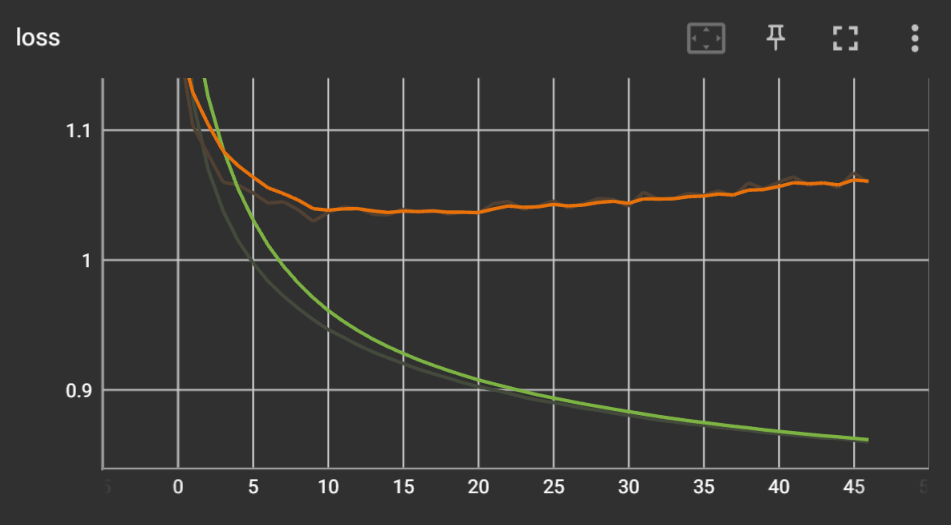
- 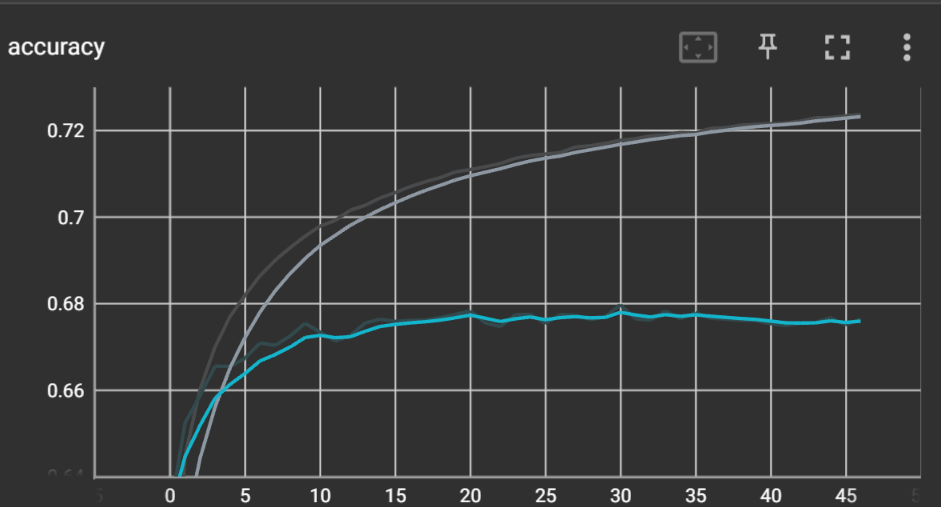

## experiment ? (dynamic mel global norm)
- lr=1e-3
- todo...

In [38]:
net = SimpleNet(mspec_val_x.shape[1])
net.load_state_dict(torch.load("experiment_11.pt"))
net.eval()
net.to("cuda")

SimpleNet(
  (fc1): Linear(in_features=40, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=61, bias=True)
)

### 1. frame-by frame at state level is just accuracy

In [41]:
train_x = torch.tensor(mspec_train_x)
if type(train_y) != torch.Tensor:
    train_y = torch.tensor(train_y)


# create the data loaders for training and validation sets
train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


total_train = 0
correct_train = 0

predicted_labels = []
for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device).long()
    

    outputs = net(inputs)
    _,predicted = torch.max(outputs,1)
    predicted_labels.append(np.array(predicted.cpu()))
    #training accuracy
    total_train += labels.size(0)
    correct_train += torch.sum(predicted==labels).item()
# calculate the validation loss

# print the epoch loss

train_acc = correct_train / total_train
print(f'train_acc={train_acc}')


train_acc=0.7237876884144536


In [55]:
def confusion_matrix(y_pred, y_true, num_classes):
    # Assuming y_pred and y_true are numpy arrays
    # and y_pred contains class indices (not probabilities)
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int64)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return conf_matrix
conf_matrix = confusion_matrix(np.concatenate(predicted_labels), np.array(train_y),output_dim)

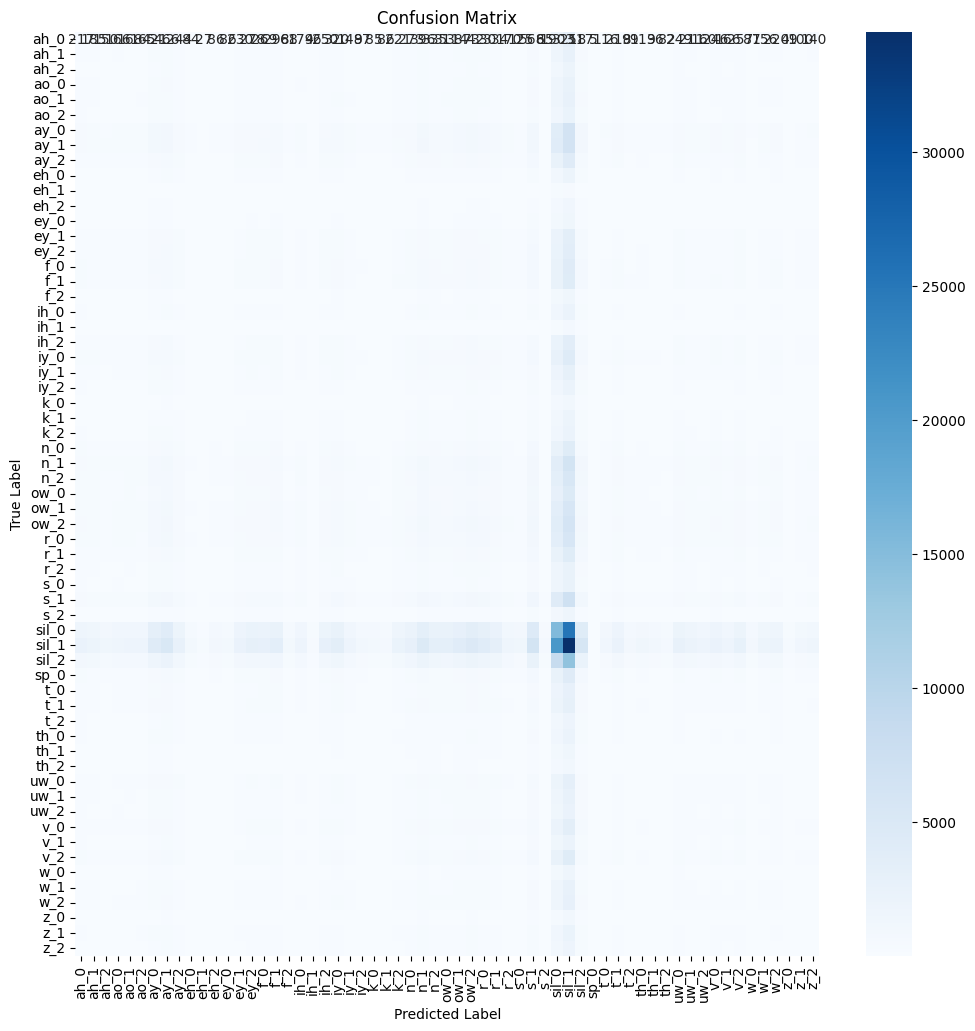

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    # Set up the figure
    plt.figure(figsize=(12, 12))
    # Use a heatmap for the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(conf_matrix,stateList)

### 2. frame-by-frame at the phoneme level 

In [42]:
pred_phoneme_list = []
label_phoneme_list = []
for idx in np.concatenate(predicted_labels):
    pred_phoneme_list.append(stateList[idx][:-2])
#do the same for the labels
for idx in np.array(train_y):
    label_phoneme_list.append(stateList[idx][:-2])
pred_phonemes = np.array(pred_phoneme_list)
label_phonemes = np.array(label_phoneme_list)

In [43]:
np.mean(pred_phonemes==label_phonemes)

0.12457559335915003

how is ↑ lower than the accuracy???

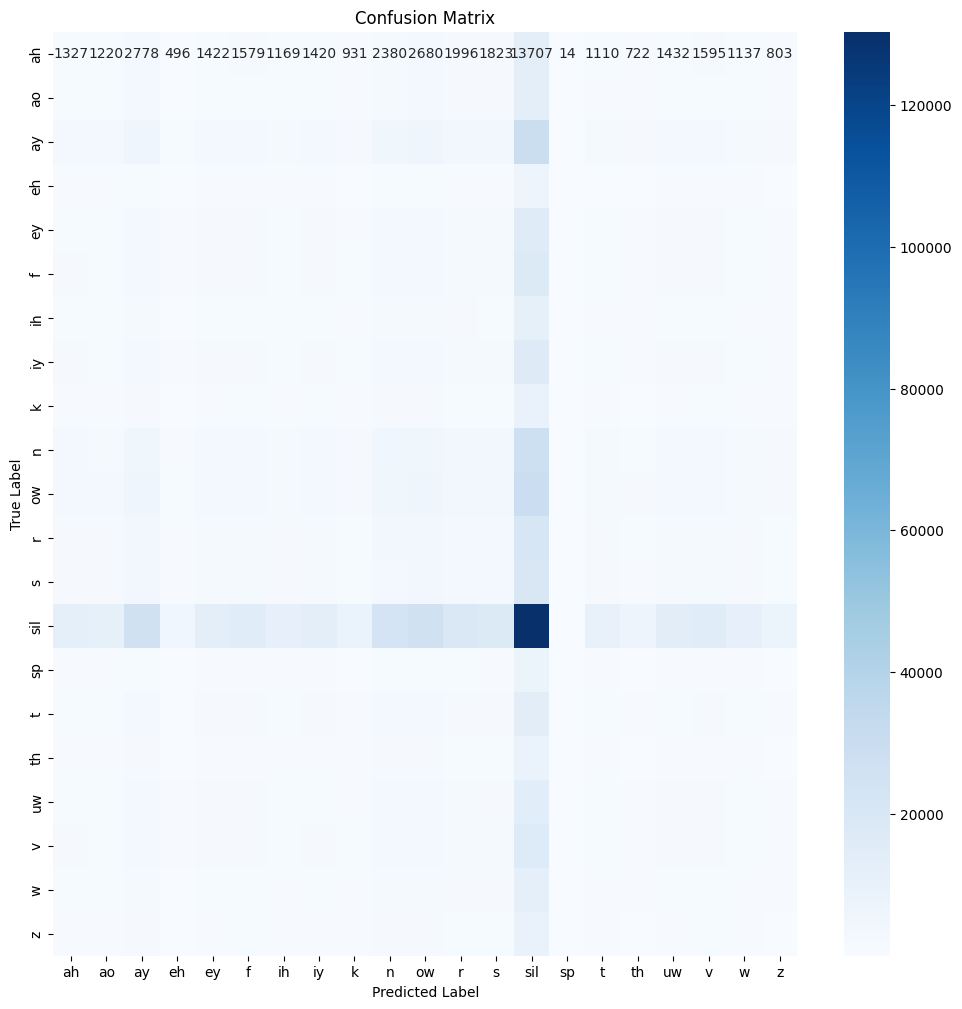

In [81]:
pred_phonemes_idcs = [phones.index(p) for p in pred_phonemes]
actual_phonemes_idcs = [phones.index(p) for p in label_phonemes]

plot_confusion_matrix(confusion_matrix(pred_phonemes_idcs,actual_phonemes_idcs,len(phones)),phones)

### 3. edit distance at the state level

In [45]:
pred_label_names = np.array([stateList[idx] for idx in np.concatenate(predicted_labels)])
actual_label_names = np.array([stateList[idx] for idx in train_y])

In [47]:
def remove_cons_dup(arr):
    # Start with the first element
    unique_consecutives = [arr[0]]
    
    # Loop through each subsequent element
    for i in range(1, len(arr)):
        if arr[i] != arr[i - 1]:
            unique_consecutives.append(arr[i])
    
    return np.array(unique_consecutives)

unique_predicted_label_names = remove_cons_dup(pred_label_names)
unique_actual_label_names = remove_cons_dup(actual_label_names)
print(len(unique_actual_label_names),len(unique_predicted_label_names))
print(unique_actual_label_names[:25])
print(actual_label_names[:25])

275104 1278208
['sil_0' 'sil_1' 'sil_2' 's_0' 's_1' 's_2' 'ih_0' 'ih_1' 'ih_2' 'k_0'
 'k_1' 'k_2' 's_0' 's_1' 's_2' 'sp_0' 't_0' 't_1' 't_2' 'uw_0' 'uw_1'
 'uw_2' 'ow_0' 'ow_1' 'ow_2']
['sil_0' 'sil_0' 'sil_0' 'sil_0' 'sil_0' 'sil_0' 'sil_0' 'sil_0' 'sil_0'
 'sil_0' 'sil_0' 'sil_0' 'sil_0' 'sil_1' 'sil_1' 'sil_1' 'sil_1' 'sil_1'
 'sil_1' 'sil_2' 'sil_2' 's_0' 's_1' 's_1' 's_1']


In [48]:
import Levenshtein as lev

def phone_error_rate(ref, hyp):
    # Calculate Levenshtein distance
    distance = lev.distance(ref, hyp)
    # Normalize by the length of the reference
    per = distance / len(ref)
    return per
phone_error_rate(unique_predicted_label_names,actual_label_names)

0.976160374524334

### 4. edit distance at the phoneme level

In [50]:
phone_error_rate(pred_phonemes,label_phonemes)

0.8535747375491428